<a href="https://colab.research.google.com/github/godpiss/PyTorch_excercises/blob/main/SimpleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch


In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

In [3]:
# Check for GPU
import torch
torch.cuda.is_available()

True

In [4]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
weight=0.3
bias=0.9
#create datapoinrs
start=0
end=10
step=0.02
X=  torch.arange(start,end,step)#FEATURES
y=weight*X+bias#LABELS
X.size()

torch.Size([500])

In [6]:
X[:10],y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.9000, 0.9060, 0.9120, 0.9180, 0.9240, 0.9300, 0.9360, 0.9420, 0.9480,
         0.9540]))

In [7]:
#TRAIN-TEST SPLIT
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

X_train.size(),X_test.size()

(torch.Size([400]), torch.Size([100]))

In [30]:


def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
        self.bias=nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)

    def forward(self,x):
        return self.weights*x+self.bias




In [10]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
with torch.inference_mode():
    y_pred=model_0(X_test)


In [13]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_pred)}")
print(f"Predicted values:\n{y_pred}")

Number of testing samples: 100
Number of predictions made: 100
Predicted values:
tensor([2.8223, 2.8291, 2.8358, 2.8425, 2.8493, 2.8560, 2.8627, 2.8695, 2.8762,
        2.8829, 2.8897, 2.8964, 2.9031, 2.9099, 2.9166, 2.9233, 2.9301, 2.9368,
        2.9435, 2.9503, 2.9570, 2.9637, 2.9705, 2.9772, 2.9839, 2.9907, 2.9974,
        3.0041, 3.0109, 3.0176, 3.0243, 3.0311, 3.0378, 3.0445, 3.0513, 3.0580,
        3.0647, 3.0715, 3.0782, 3.0850, 3.0917, 3.0984, 3.1052, 3.1119, 3.1186,
        3.1254, 3.1321, 3.1388, 3.1456, 3.1523, 3.1590, 3.1658, 3.1725, 3.1792,
        3.1860, 3.1927, 3.1994, 3.2062, 3.2129, 3.2196, 3.2264, 3.2331, 3.2398,
        3.2466, 3.2533, 3.2600, 3.2668, 3.2735, 3.2802, 3.2870, 3.2937, 3.3004,
        3.3072, 3.3139, 3.3206, 3.3274, 3.3341, 3.3408, 3.3476, 3.3543, 3.3610,
        3.3678, 3.3745, 3.3812, 3.3880, 3.3947, 3.4014, 3.4082, 3.4149, 3.4216,
        3.4284, 3.4351, 3.4418, 3.4486, 3.4553, 3.4620, 3.4688, 3.4755, 3.4822,
        3.4890])


## error:

In [14]:
y_test-y_pred

tensor([0.4777, 0.4769, 0.4762, 0.4755, 0.4747, 0.4740, 0.4733, 0.4725, 0.4718,
        0.4711, 0.4703, 0.4696, 0.4689, 0.4681, 0.4674, 0.4667, 0.4659, 0.4652,
        0.4645, 0.4637, 0.4630, 0.4623, 0.4615, 0.4608, 0.4601, 0.4593, 0.4586,
        0.4579, 0.4571, 0.4564, 0.4557, 0.4549, 0.4542, 0.4535, 0.4527, 0.4520,
        0.4513, 0.4505, 0.4498, 0.4490, 0.4483, 0.4476, 0.4468, 0.4461, 0.4454,
        0.4446, 0.4439, 0.4432, 0.4424, 0.4417, 0.4410, 0.4402, 0.4395, 0.4388,
        0.4380, 0.4373, 0.4366, 0.4358, 0.4351, 0.4344, 0.4336, 0.4329, 0.4322,
        0.4314, 0.4307, 0.4300, 0.4292, 0.4285, 0.4278, 0.4270, 0.4263, 0.4256,
        0.4248, 0.4241, 0.4234, 0.4226, 0.4219, 0.4212, 0.4204, 0.4197, 0.4190,
        0.4182, 0.4175, 0.4168, 0.4160, 0.4153, 0.4146, 0.4138, 0.4131, 0.4124,
        0.4116, 0.4109, 0.4102, 0.4094, 0.4087, 0.4080, 0.4072, 0.4065, 0.4058,
        0.4050])

In [25]:
#since predictions are pretty bad as we guessing randomly , lets use optimizer and loss funtion
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [39]:
#pytorch training loop
epochs=300
train_loss_value=[]
test_loss_value=[]
epoch_count=[]
for epoch in range(epochs):
    model_0.train()
    y_pred=model_0(X_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epochs % 20 ==0:

        model_0.eval()
        test_loss=0.0
        with torch.inference_mode():
            test_pred=model_0(X_test)
            test_loss=loss_fn(test_pred,y_test.type(torch.float))

        if epoch % 20==0:
            epoch_count.append(epoch)
            train_loss_value.append(loss.detach().numpy())
            test_loss_value.append(test_loss.detach().numpy())
            print(f"EpochL:{ epoch} |  MAE LOSS: {loss} | MAE TEST LOSS: {test_loss}")





EpochL:0 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:20 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:40 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:60 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:80 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:100 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:120 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:140 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:160 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:180 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:200 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:220 |  MAE LOSS: 0.03233407810330391 | MAE TEST LOSS: 0.30832430720329285
EpochL:240 |  MAE LOSS: 0.03233407

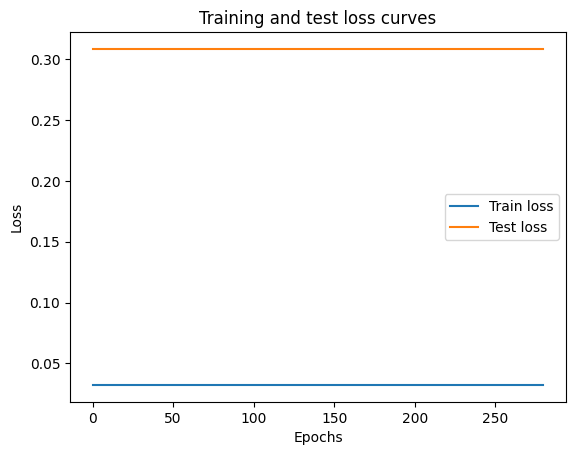

In [40]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_value, label="Train loss")
plt.plot(epoch_count, test_loss_value, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend();

In [41]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.2944])), ('bias', tensor([0.8900]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [29]:
model_0.eval()
with torch.inference_mode():
    y_preds=model_0(X_test)
y_preds

tensor([3.2924, 3.2985, 3.3045, 3.3106, 3.3166, 3.3227, 3.3287, 3.3348, 3.3408,
        3.3469, 3.3529, 3.3590, 3.3650, 3.3711, 3.3771, 3.3832, 3.3892, 3.3953,
        3.4013, 3.4074, 3.4134, 3.4195, 3.4255, 3.4315, 3.4376, 3.4436, 3.4497,
        3.4557, 3.4618, 3.4678, 3.4739, 3.4799, 3.4860, 3.4920, 3.4981, 3.5041,
        3.5102, 3.5162, 3.5223, 3.5283, 3.5344, 3.5404, 3.5465, 3.5525, 3.5586,
        3.5646, 3.5707, 3.5767, 3.5828, 3.5888, 3.5949, 3.6009, 3.6070, 3.6130,
        3.6191, 3.6251, 3.6312, 3.6372, 3.6433, 3.6493, 3.6554, 3.6614, 3.6675,
        3.6735, 3.6796, 3.6856, 3.6917, 3.6977, 3.7038, 3.7098, 3.7159, 3.7219,
        3.7280, 3.7340, 3.7401, 3.7461, 3.7522, 3.7582, 3.7643, 3.7703, 3.7764,
        3.7824, 3.7885, 3.7945, 3.8006, 3.8066, 3.8127, 3.8187, 3.8248, 3.8308,
        3.8369, 3.8429, 3.8490, 3.8550, 3.8611, 3.8671, 3.8732, 3.8792, 3.8853,
        3.8913])

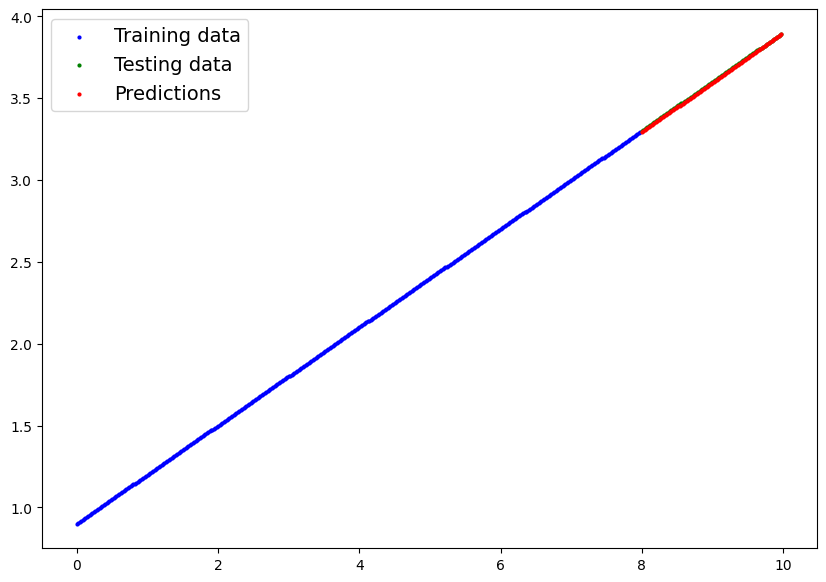

In [31]:
plot_predictions(predictions=y_preds)


In [33]:
from pathlib import Path
model_path=Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name="Pytorch_LR_00"
model_save_path=model_path/model_name
print(f"Saving model to : {model_save_path}")
torch.save(obj=model_0.state_dict(),f=model_save_path)

Saving model to : models/Pytorch_LR_00


In [57]:
loaded_model_1=LinearRegressionModel()
loaded_model_1.load_state_dict(torch.load(model_save_path))
loaded_model_1.to(device)
print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")


Loaded model:
LinearRegressionModel()
Model on device:
cuda:0


In [58]:
# Evaluate loaded model
loaded_model_1.eval()
X_test = X_test.to(device)
y_preds=y_preds.to(device)
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

SyntaxError: invalid syntax (<ipython-input-59-f188d5ac1197>, line 1)